[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


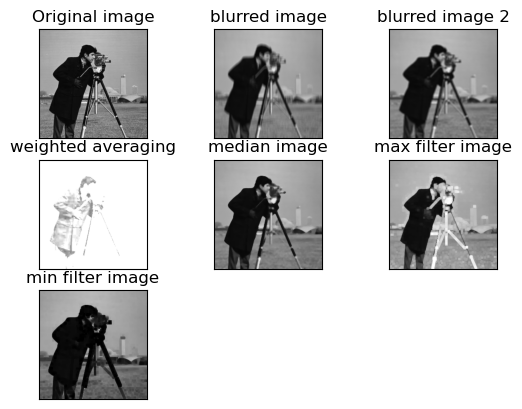

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread('cameraman.jpg')
img_blur=cv2.blur(img,[3,9])

kernel=np.ones([5,5],dtype=float)/25
img_blur2=cv2.filter2D(img, -1, kernel)
print(kernel)

kernel_weighted=np.array(([1,2,2],[2,1,3],[1,2,3]))
img_weighted_blur=cv2.filter2D(img,-1,kernel_weighted)
median_image=cv2.medianBlur(img,5)
max_filter=cv2.dilate(img,np.ones((5,5),np.uint8))
min_filter=cv2.erode(img,np.ones((5,5),np.uint8))

plt.subplot(3,3,1)
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.title("Original image")
plt.subplot(3,3,2)
plt.imshow(img_blur)
plt.xticks([]),plt.yticks([])
plt.title("blurred image")
plt.subplot(3,3,3)
plt.imshow(img_blur2)
plt.xticks([]),plt.yticks([])
plt.title("blurred image 2")
plt.subplot(3,3,4)
plt.imshow(img_weighted_blur)
plt.xticks([]),plt.yticks([])
plt.title("weighted averaging")
plt.subplot(3,3,5)
plt.imshow(median_image)
plt.xticks([]),plt.yticks([])
plt.title("median image")
plt.subplot(3,3,6)
plt.imshow(max_filter)
plt.xticks([]),plt.yticks([])
plt.title("max filter image")
plt.subplot(3,3,7)
plt.imshow(min_filter)
plt.xticks([]),plt.yticks([])
plt.title("min filter image")

plt.show()

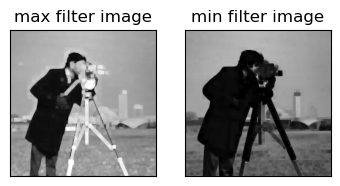

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread('cameraman.jpg')
img_blur=cv2.blur(img,[5,4])

kernel=np.ones([5,5],dtype=float)/25
img_blur2=cv2.filter2D(img, -1, kernel)

max_filter=cv2.dilate(img,np.ones((5,5),np.uint8))
min_filter=cv2.erode(img,np.ones((5,5),np.uint8))

plt.subplot(2,3,1)
plt.imshow(max_filter)
plt.xticks([]),plt.yticks([])
plt.title("max filter image")
plt.subplot(2,3,2)
plt.imshow(min_filter)
plt.xticks([]),plt.yticks([])
plt.title("min filter image")

plt.show()




Text(0.5, 1.0, 'blurred image')

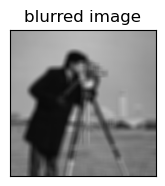

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread('cameraman.jpg')
img_blur=cv2.blur(img,[11,11])


plt.subplot(2,3,1)
plt.imshow(img_blur)
plt.xticks([]),plt.yticks([])
plt.title("blurred image")

In [4]:
import random 
import cv2 

def add_noise(img): 

	row , col = img.shape 
	
	number_of_pixels = random.randint(300, 10000) 
	for i in range(number_of_pixels): 
		y_coord=random.randint(0, row - 1) 
		x_coord=random.randint(0, col - 1) 
		
		img[y_coord][x_coord] = 255

	number_of_pixels = random.randint(300 , 10000) 
	for i in range(number_of_pixels): 
		
		# Pick a random y coordinate 
		y_coord=random.randint(0, row - 1) 
		
		# Pick a random x coordinate 
		x_coord=random.randint(0, col - 1) 
		
		# Color that pixel to black 
		img[y_coord][x_coord] = 0
		
	return img 

img = cv2.imread('cameraman.jpg', 
				cv2.IMREAD_GRAYSCALE) 

#Storing the image 
cv2.imwrite('salt-and-pepperimage.jpg', 
			add_noise(img)) 


True

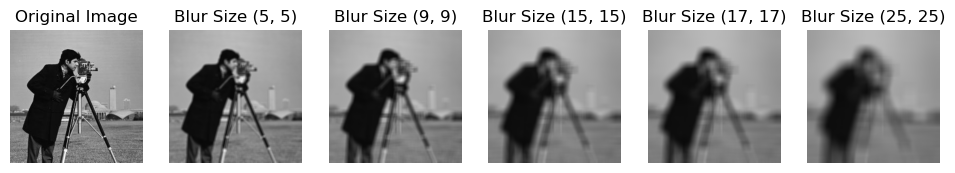

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('cameraman.jpg')
blur_sizes = [(5, 5), (9, 9), (15, 15), (17,17), (25, 25)]
plt.figure(figsize=(12, 8))

plt.subplot(1, len(blur_sizes) + 1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i, size in enumerate(blur_sizes):
    img_blur = cv2.blur(img, size)
    plt.subplot(1, len(blur_sizes) + 1, i + 2)
    plt.imshow(img_blur)
    plt.title(f'Blur Size {size}')
    plt.axis('off')

plt.show()


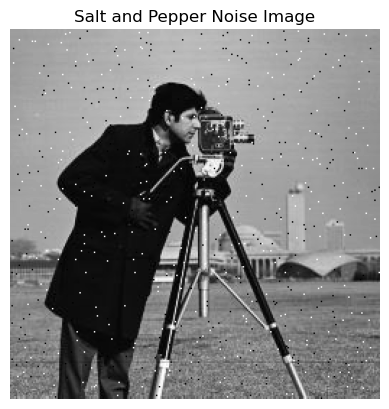

In [6]:
import random
import cv2
import matplotlib.pyplot as plt

def add_noise(img):
    """Add salt and pepper noise to the grayscale image."""
    row, col = img.shape
    num_noise = random.randint(300, 10000)  # Total number of noise points

    # Add noise: randomly choose salt (255) or pepper (0)
    for _ in range(num_noise):
        y, x = random.randint(0, row - 1), random.randint(0, col - 1)
        img[y, x] = 255 if random.choice([True, False]) else 0
        
    return img

# Load image in grayscale and add noise
img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)
noisy_img = add_noise(img)

# Display the noisy image
plt.imshow(noisy_img, cmap='gray')
plt.title('Salt and Pepper Noise Image')
plt.axis('off')
plt.show()


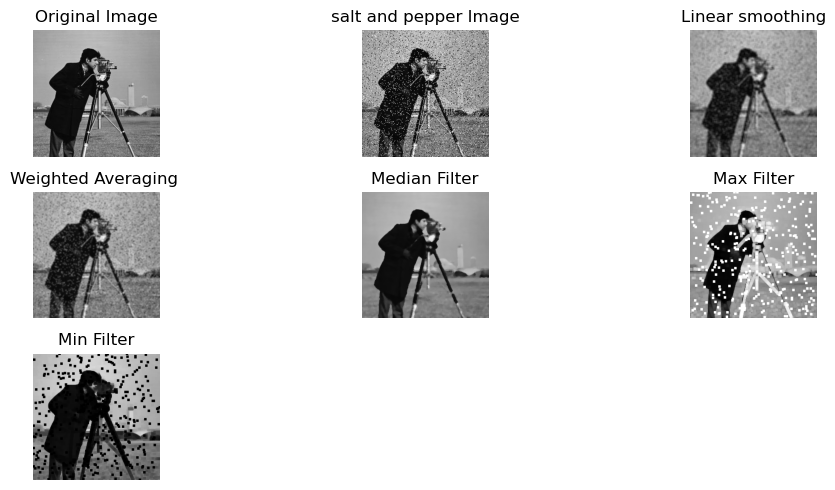

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size
    num_salt = int(np.ceil(salt_prob * total_pixels))
    num_pepper = int(np.ceil(pepper_prob * total_pixels))

    # Add salt noise
    salt_coords = (np.random.randint(0, i, num_salt) for i in image.shape)
    salt_coords = [np.array(coord) for coord in salt_coords]
    noisy[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise
    pepper_coords = (np.random.randint(0, i, num_pepper) for i in image.shape)
    pepper_coords = [np.array(coord) for coord in pepper_coords]
    noisy[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy

def apply_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def apply_median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

image = cv2.imread('cameraman.jpg')

salt_prob, pepper_prob = 0.02, 0.02
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

kernel_size = 5
kernel_avg = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size * kernel_size)

kernel_gauss = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
]) / 256.0

img_avg = apply_filter(noisy_image, kernel_avg)
weighted_avg = apply_filter(noisy_image, kernel_gauss)
median_filter = apply_median_filter(noisy_image, kernel_size)
max_filter=cv2.dilate(img,np.ones((5,5),np.uint8))
min_filter=cv2.erode(img,np.ones((5,5),np.uint8))

plt.figure(figsize=(10, 5))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('salt and pepper Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Linear smoothing')
plt.imshow(img_avg, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Weighted Averaging ')
plt.imshow(weighted_avg, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Median Filter')
plt.imshow(median_filter, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Max Filter')
plt.imshow(max_filter, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Min Filter')
plt.imshow(min_filter, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()


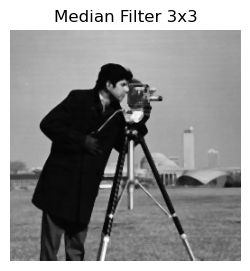

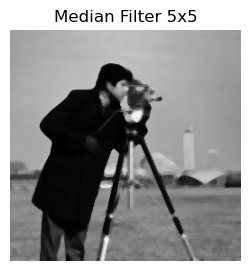

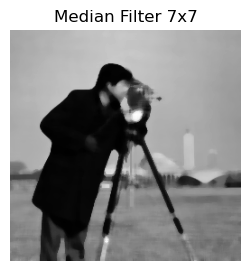

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)
    
image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)
sizes = [3, 5, 7]

for size in sizes:
    filtered_image = apply_median_filter(image, size)
    plt.figure(figsize=(3, 3))
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Median Filter {size}x{size}')
    plt.axis('off')
    plt.show()


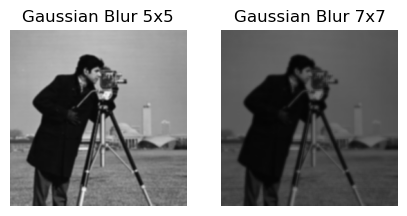

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_blur(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Define Gaussian kernels
kernel_gauss_5x5 = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
]) / 256

kernel_gauss_7x7 = np.array([
    [1, 1, 2, 2, 2, 1, 1],
    [1, 2, 2, 4, 2, 2, 1],
    [2, 2, 4, 8, 4, 2, 2],
    [2, 4, 8, 16, 8, 4, 2],
    [2, 2, 4, 8, 4, 2, 2],
    [1, 2, 2, 4, 2, 2, 1],
    [1, 1, 2, 2, 2, 1, 1]
]) / 256

image = cv2.imread('cameraman.jpg')  

blurred_image_5x5 = apply_gaussian_blur(image, kernel_gauss_5x5)
blurred_image_7x7 = apply_gaussian_blur(image, kernel_gauss_7x7)

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_image_5x5, cmap='gray')
plt.title('Gaussian Blur 5x5')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_7x7, cmap='gray')
plt.title('Gaussian Blur 7x7')
plt.axis('off')
plt.show()


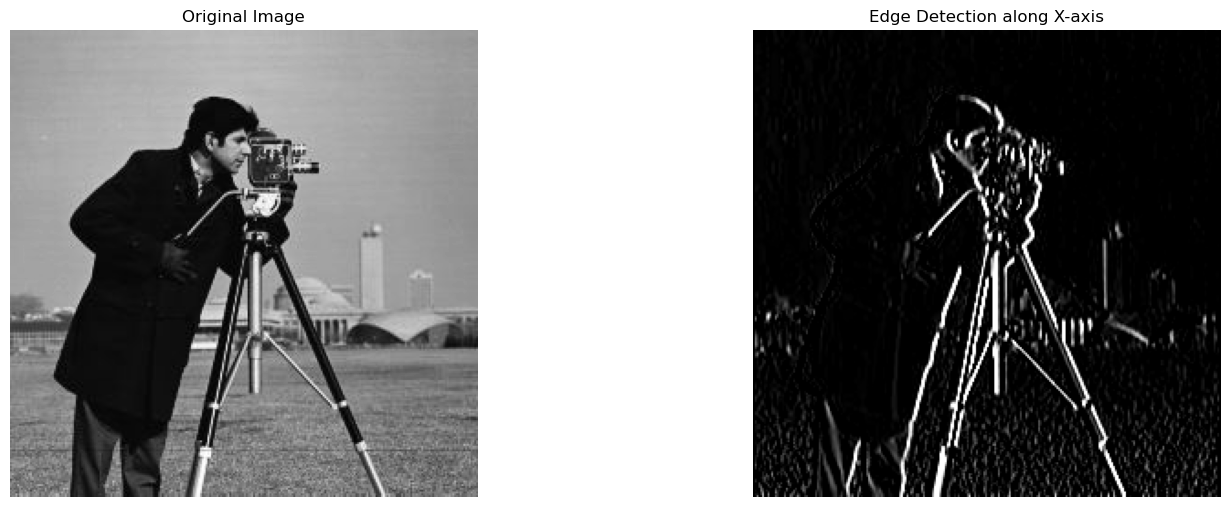

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Prewitt operator 
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

kx = cv2.filter2D(image, -1, prewitt_x)
ky = cv2.filter2D(image, -1, prewitt_y)

ked = np.sqrt(np.square(kx) + np.square(ky))

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Edge Detection along X-axis')
plt.imshow(np.abs(kx), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

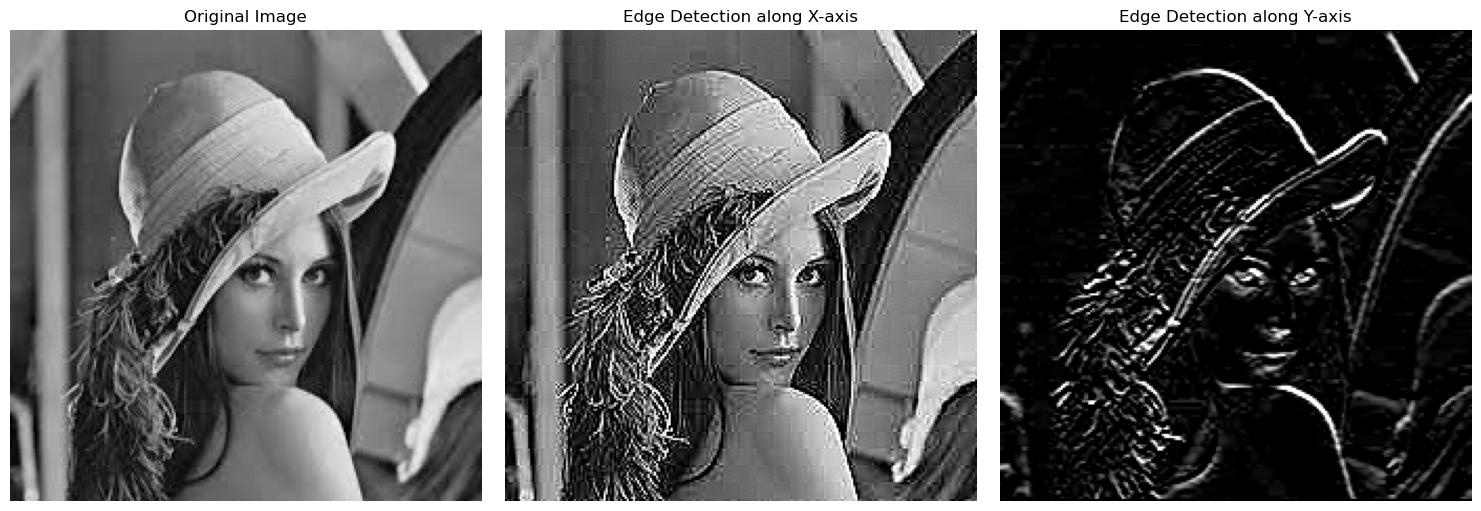

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Lena.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel operator kernels
sobel_x = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply convolution with Sobel kernels
kx = cv2.filter2D(image, -1, sobel_x)
ky = cv2.filter2D(image, -1, sobel_y)

# Calculate the magnitude of the gradient
ked = np.sqrt(np.square(kx) + np.square(ky))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Edge Detection along X-axis')
plt.imshow(np.abs(kx), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Edge Detection along Y-axis')
plt.imshow(np.abs(ky), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

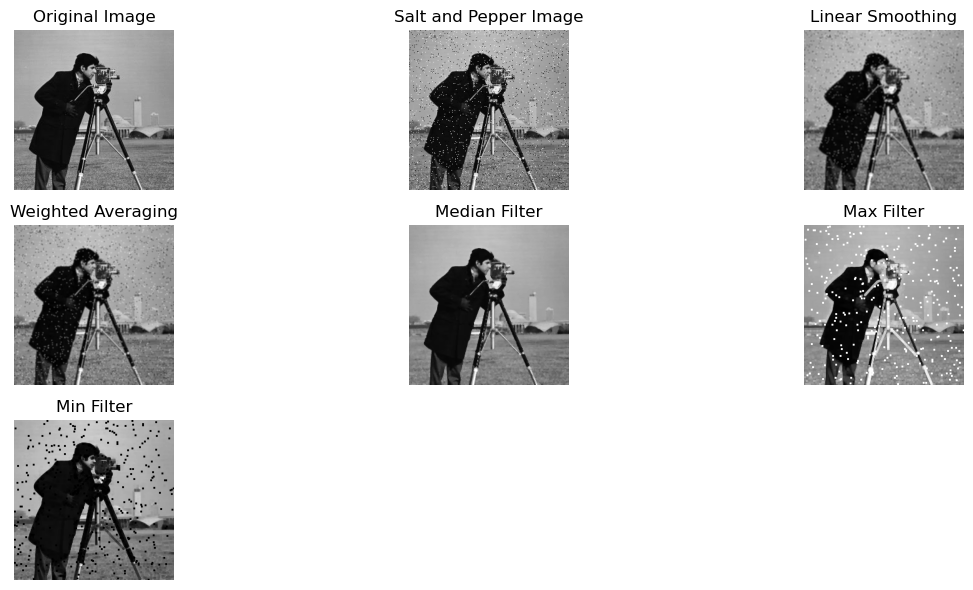

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy = np.copy(image)
    total_pixels = image.size
    num_salt = int(np.ceil(salt_prob * total_pixels))
    num_pepper = int(np.ceil(pepper_prob * total_pixels))

    salt_coords = (np.random.randint(0, i, num_salt) for i in image.shape)
    salt_coords = [np.array(coord) for coord in salt_coords]
    noisy[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = (np.random.randint(0, i, num_pepper) for i in image.shape)
    pepper_coords = [np.array(coord) for coord in pepper_coords]
    noisy[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy

def apply_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def apply_median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

salt_prob, pepper_prob = 0.02, 0.02
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

kernel_size = 3
kernel_avg = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size * kernel_size)

kernel_gauss = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16.0

img_avg = apply_filter(noisy_image, kernel_avg)
weighted_avg = apply_filter(noisy_image, kernel_gauss)
median_filter = apply_median_filter(noisy_image, kernel_size)
max_filter = cv2.dilate(img, np.ones((3, 3), np.uint8))
min_filter = cv2.erode(img, np.ones((3, 3), np.uint8))

plt.figure(figsize=(12, 6))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.title('Salt and Pepper Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.subplot(3, 3, 3)
plt.title('Linear Smoothing')
plt.imshow(img_avg, cmap='gray')
plt.axis('off')
plt.subplot(3, 3, 4)
plt.title('Weighted Averaging')
plt.imshow(weighted_avg, cmap='gray')
plt.axis('off')
plt.subplot(3, 3, 5)
plt.title('Median Filter')
plt.imshow(median_filter, cmap='gray')
plt.axis('off')
plt.subplot(3, 3, 6)
plt.title('Max Filter')
plt.imshow(max_filter, cmap='gray')
plt.axis('off')
plt.subplot(3, 3, 7)
plt.title('Min Filter')
plt.imshow(min_filter, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


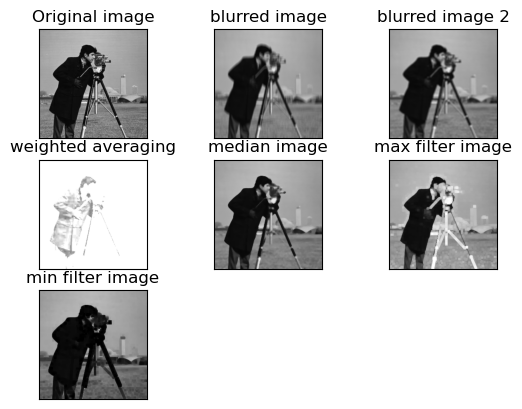

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread('cameraman.jpg')
img_blur=cv2.blur(img,[3,9])

kernel=np.ones([5,5],dtype=float)/25
img_blur2=cv2.filter2D(img, -1, kernel)
print(kernel)

kernel_weighted=np.array(([1,2,2],[2,1,3],[1,2,3]))
img_weighted_blur=cv2.filter2D(img,-1,kernel_weighted)
median_image=cv2.medianBlur(img,5)
max_filter=cv2.dilate(img,np.ones((5,5),np.uint8))
min_filter=cv2.erode(img,np.ones((5,5),np.uint8))

plt.subplot(3,3,1)
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.title("Original image")
plt.subplot(3,3,2)
plt.imshow(img_blur)
plt.xticks([]),plt.yticks([])
plt.title("blurred image")
plt.subplot(3,3,3)
plt.imshow(img_blur2)
plt.xticks([]),plt.yticks([])
plt.title("blurred image 2")
plt.subplot(3,3,4)
plt.imshow(img_weighted_blur)
plt.xticks([]),plt.yticks([])
plt.title("weighted averaging")
plt.subplot(3,3,5)
plt.imshow(median_image)
plt.xticks([]),plt.yticks([])
plt.title("median image")
plt.subplot(3,3,6)
plt.imshow(max_filter)
plt.xticks([]),plt.yticks([])
plt.title("max filter image")
plt.subplot(3,3,7)
plt.imshow(min_filter)
plt.xticks([]),plt.yticks([])
plt.title("min filter image")

plt.show()

In [ ]:
import cv2
import numpy as np

# Read the grayscale image
image = cv2.imread('cameraman.jpg',cv2.IMREAD_GRAYSCALE)

# a. Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
cv2.imwrite('laplacian.jpg', laplacian)

# b. Filtering Using Composite Mask
composite_mask = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
filtered_image = cv2.filter2D(image, -1, composite_mask)
cv2.imwrite('composite_mask.jpg', filtered_image)

# c. Unsharp Masking
blurred = cv2.GaussianBlur(image, (5, 5), 0)
unsharp_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
cv2.imwrite('unsharp_masking.jpg', unsharp_image)

# d. High Boost Filtering
high_boost = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
cv2.imwrite('high_boost_filtering.jpg', high_boost)

# e. Filtering Using First Order Derivative Operators (Sobel and Prewitt)

# Sobel Filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)
cv2.imwrite('sobel_filter.jpg', sobel_combined)

# Prewitt Filter
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=np.float32)

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]], dtype=np.float32)

prewitt_filtered_x = cv2.filter2D(image.astype(np.float32), -1, prewitt_x)
prewitt_filtered_y = cv2.filter2D(image.astype(np.float32), -1, prewitt_y)

prewitt_combined = cv2.magnitude(prewitt_filtered_x, prewitt_filtered_y)
prewitt_combined = cv2.convertScaleAbs(prewitt_combined)
cv2.imwrite('prewitt_filter.jpg', prewitt_combined)

# Display results
cv2.imshow('Laplacian Filter', laplacian)
cv2.imshow('Composite Mask Filtering', filtered_image)
cv2.imshow('Unsharp Masking', unsharp_image)
cv2.imshow('High Boost Filtering', high_boost)
cv2.imshow('Sobel Filter', sobel_combined)
cv2.imshow('Prewitt Filter', prewitt_combined)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalisation(input_Image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(input_Image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)
    
    # Convert the equalized image back to color
    enhanced_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)
    
    return enhanced_image

# Specify the image path
image_path = 'cameraman.jpg'

# Check if the image file exists
if not os.path.exists(image_path):
    print("File does not exist. Please check the path.")
else:
    # Read the input image
    input_Image = cv2.imread(image_path)

    # Apply histogram equalization
    enhanced_Image = histogram_equalisation(input_Image)

    # Set up the matplotlib subplot
    plt.figure(figsize=(12, 6))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(input_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Show enhanced image
    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced_Image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Display the images
    plt.tight_layout()
    plt.show()


In [ ]:
cv2.laplacian for question 3 use any of the sharpening mask for composite mask only on n4 
0 -1 0
-1 5 -1
0 -1 0